## Problem 1 - Linear Separability

### Answer 1.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

%matplotlib inline

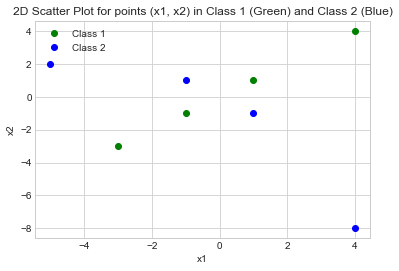

In [2]:
x_class_1 = np.array([-1, 1, -3, 4])
y_class_1 = np.array([-1, 1, -3, 4])

x_class_2 = np.array([-1, 1, -5, 4])
y_class_2 = np.array([1, -1, 2, -8])

plt.plot(x_class_1, y_class_1, 'o', color='green', label='Class 1')
ax = plt.gca()
ax.set(xlabel = 'x1', ylabel = 'x2')

plt.plot(x_class_2, y_class_2, 'o', color='blue', label='Class 2')
ax = plt.gca()
ax.set(xlabel = 'x1', ylabel = 'x2')

plt.title('2D Scatter Plot for points (x1, x2) in Class 1 (Green) and Class 2 (Blue)')
plt.legend()
plt.show()

Let the first set of points belongs to Class 1 and the other set belongs to Class 2.

Green points denote Class 1 while Blue Points denote Class 2. $x_1$ is the horizontal dimension while $x_2$ is the vertical one.

We can see from the plot above that the dataset $\text{IS NOT LINEARLY SEPARABLE}$ using any linear function/classifier, given only two features $ x_1$ and $x_2$ (without further transformation into a higher space). 


### Answer 1.2

Looking at the points from Class 1 and Class 2, we could see that:
1. $x_1$ and $x_2$ in Class 1 are of the same sign
2. $x_1$ and $x_2$ in Class 2 are of the opposite sign

Thus, we could propose some $z$ such as: $${z = x_1 * x_2}$$

This is linearly separable because Class 1 will all have positive values of $z$ while Class 2 will all have negative values of $z$.

### Answer 1.3

Suppose we have a 1D plane which plots $z$ for Class 1 and Class 2. Green lines denote Class 1 while Blue Points denote Class 2.

The separating hyperplane (or point, because this is 1D) is simply $z=c$, where $c$ is any constant satisfying $-1 < c < 1$. I pick $c=0$, which is denoted by the thick and short red line in the plot.

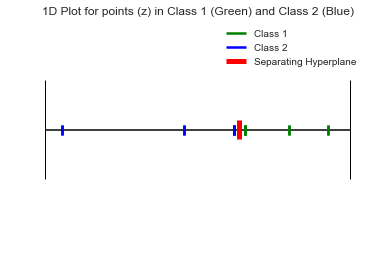

In [3]:
z_class_1 = np.multiply(x_class_1, y_class_1)
z_class_2 = np.multiply(x_class_2, y_class_2)

z_class_1 = np.repeat(z_class_1, 2)
z_class_2 = np.repeat(z_class_2, 2)

plt.figure()
plt.hlines(1, -35, 20)  

plt.eventplot(z_class_1, orientation='horizontal', colors='green', linelengths=0.1, linewidths=2.5, label='Class 1')
plt.eventplot(z_class_2, orientation='horizontal', colors='blue', linelengths=0.1, linewidths=2.5, label='Class 2')

plt.eventplot([-35, 20], orientation='horizontal', colors='black', linelengths=1, linewidths=1)
plt.eventplot([0], orientation='horizontal', colors='red', linelengths=0.2, linewidths=5, label='Separating Hyperplane')

plt.axis('off')

plt.title('1D Plot for points (z) in Class 1 (Green) and Class 2 (Blue)')
plt.legend()
plt.show()

### Answer for Problem 1.4

Because ...

## Problem 2 - Bias Variance Tradeoff, Regularization

### Answer 2.1

$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t(f(x_i) + \epsilon - g(x_i))^2] $$

Introduce terms $E[g(x_i]$ that will cancel each other:
$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t (f(x_i) + \epsilon - g(x_i) + E[g(x_i)] - E[g(x_i)])^2] $$

Using linearity in expectation:
$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[\epsilon^2] + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2] + \frac{2}{t} \sum_{i=1}^t E[\epsilon(f(x_i) - E[g(x_i)])] + \frac{2}{t} \sum_{i=1}^t E[\epsilon(E[g(x_i)] - g(x_i))] + \frac{2}{t} \sum_{i=1}^t E[((f(x_i) - E[g(x_i))(E[g(x_i)] - g(x_i))]] $$

Notice that $E[g(x_i)] = g(x_i)$, so that lefts us with:
$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[\epsilon^2] + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2]$$

Again, using linearity in expectation:
$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2] + E[\frac{1}{t} \sum_{i=1}^t E[\epsilon^2]] + E[\frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2]$$

$$ E[MSE] = \frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[\epsilon^2] + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2$$

$$ E[MSE] = \frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2] + \frac{1}{t}(t) E[\epsilon^2]$$

$$ E[MSE] = \frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2] + E[\epsilon^2]$$

Finally:
$$ E[MSE] = Bias[g(x)]^2 + Var[g(x)] + Noise $$

where:
1. $$ Bias[g(x)]^2 = \frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 $$
2. $$ Var[g(x)] = \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2 $$
3. $$ Noise = E[\epsilon^2] $$

### Answer 2.2

The black line plot depicts $f(x)$ while the red dots (20 in total) are the samples drawn from $y(x)$. 

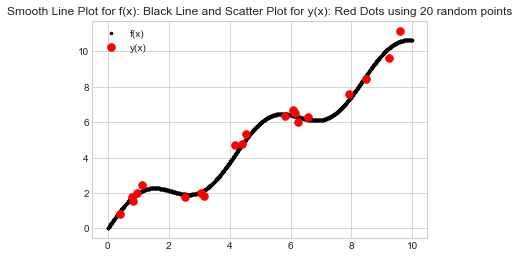

In [4]:
def f_x(x):
    return x + np.sin((3/2)*x)

x_smooth = np.arange(0, 10, 0.01)
f_x_plot_dots = f_x(x_smooth)

def generate_sample_from_y(x_rand, use_noise=True):
    y = f_x(x_rand)
    
    if use_noise:
        y = y + np.random.normal(0, 0.3, len(x_rand))
        
    return y
    
x_rand = np.random.uniform(0, 10, 20)
y_x_plot_dots = generate_sample_from_y(x_rand, True)


plt.plot(x_smooth, f_x_plot_dots, 'o', color='black', markersize=2.5, label='f(x)')
plt.plot(x_rand, y_x_plot_dots, 'o', color='red', markersize=7.5, label='y(x)')

plt.title('Smooth Line Plot for f(x): Black Line and Scatter Plot for y(x): Red Dots using 20 random points')
plt.legend()
plt.show()

### Answer 2.3

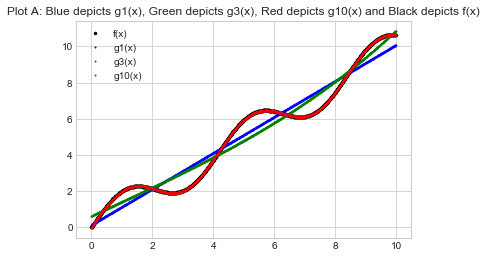

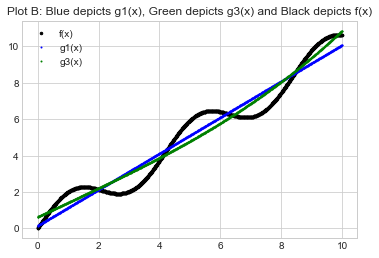

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

reshape_x_smooth = x_smooth.reshape(-1, 1)

g_1 = make_pipeline(PolynomialFeatures(1), LinearRegression())
g_1.fit(reshape_x_smooth, f_x(x_smooth).reshape(-1, 1))

g_3 = make_pipeline(PolynomialFeatures(3), LinearRegression())
g_3.fit(reshape_x_smooth, f_x(x_smooth).reshape(-1, 1))

g_10 = make_pipeline(PolynomialFeatures(10), LinearRegression())
g_10.fit(reshape_x_smooth, f_x(x_smooth).reshape(-1, 1))

plt.plot(x_smooth, f_x_plot_dots, 'o', color='black', markersize=2.5, label='f(x)')
plt.plot(x_smooth, g_1.predict(reshape_x_smooth), 'o', color='blue', markersize=1, label='g1(x)')
plt.plot(x_smooth, g_3.predict(reshape_x_smooth), 'o', color='green', markersize=1, label='g3(x)')
plt.plot(x_smooth, g_10.predict(reshape_x_smooth), 'o', color='red', markersize=1, label='g10(x)')

plt.title('Plot A: Blue depicts g1(x), Green depicts g3(x), Red depicts g10(x) and Black depicts f(x)')
plt.legend()
plt.show()

plt.plot(x_smooth, f_x_plot_dots, 'o', color='black', markersize=2.5, label='f(x)')
plt.plot(x_smooth, g_1.predict(reshape_x_smooth), 'o', color='blue', markersize=1, label='g1(x)')
plt.plot(x_smooth, g_3.predict(reshape_x_smooth), 'o', color='green', markersize=1, label='g3(x)')

plt.title('Plot B: Blue depicts g1(x), Green depicts g3(x) and Black depicts f(x)')
plt.legend()
plt.show()

In the first plot, Plot A, we can see that $g_1(x)$ (blue line) and $g_2(x)$ (green line) are underfitting while $g_{10}(x)$ (red line) is overfitting. $f(x)$, which is the black line, is fully overlayed by $g_{10}(x)$, the red line.

To make it clearer, I provide Plot B, in which I get ride of $g_10(x)$, i.e. the red line. We can compare that $g_10(x)$ resembles $f(x)$ quiet a lot, indicating overfitting.

### Answer 2.4

In [7]:
from numpy.linalg import norm

# Generate fixed 50 x_rand(s)
np.random.seed(82)
x_rand = np.random.uniform(0, 10, 50)

# Divide into train and test set
x_train = x_rand[:40]
x_test = x_rand[40:]

# y without noise
y_x_plot_dots = generate_sample_from_y(x_rand, False)
y_train = y_x_plot_dots[:40]
y_test = y_x_plot_dots[40:]

y_train_sets_noise = []
y_test_sets_noise = []

# Generate y_train and y_test
for i in range(0, 100):
    y_x_plot_dots_noise = generate_sample_from_y(x_rand, True)
    
    y_train_sets_noise.append(y_x_plot_dots_noise[:40])    
    y_test_sets_noise.append(y_x_plot_dots_noise[40:])
    
all_mean_preds = []

for degree in range(1, 16):
    preds = []
    
    # Fit only once for non noisy data
    g = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    g.fit(x_train.reshape(-1, 1), y_train_sets[i].reshape(-1, 1))
    
    # Fit 100 times for noisy data
    for i in range(0, 100):
        g_noise = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        g_noise.fit(x_train.reshape(-1, 1), y_train_sets_noise[i].reshape(-1, 1))
        
        pred_noise = g_noise.predict(x_test.reshape(-1, 1)) 
        preds.append(pred)
        
    all_mean_preds.append(np.mean(preds, axis=0))

all_mean_preds = np.array(all_mean_preds)
y_test = np.array(y_test)

avg_squared_biases = []

# Calculate bias
for i in range(0, 15):
    curr_mean_preds = all_mean_preds[i]
        
    squared_bias = 0
    for j in range(0, 10):
        squared_bias = squared_bias + (curr_mean_preds[j] - y_test[j]) ** 2

    avg_squared_bias = squared_bias / 10
    avg_squared_biases.append(avg_squared_bias)

(15, 10, 1)
(10,)


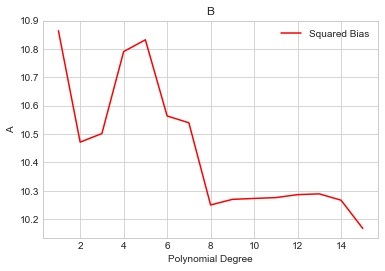

In [8]:
fig, ax = plt.subplots()

x_plots = np.arange(1, 16, 1)
y_plots = avg_squared_biases
ax.plot(x_plots, y_plots, color='red', label='Squared Bias')

ax.set_xlabel('Polynomial Degree')     
ax.set_ylabel('A')     

ax.set_title('B')
ax.legend()
ax.grid(True)

plt.show()

### Answer 2.5

## Problem 3

### Answer 3.1

Two datasets picked:
    
1. energy-efficiency (https://www.openml.org/d/1472)
2. optdigits (https://www.openml.org/d/28)

In [ ]:
import numpy as np
import pandas as pd

d1_path = 'data/energy-efficiency.csv'
d1_name = 'Energy Efficiency'

t_df = pd.read_csv(d1_path)
t_df.head()

In [ ]:
d2_path = 'data/optdigits.csv'
d2_name = 'Opt Digits'

i_df = pd.read_csv(d2_path)
i_df.head()

#### Function to Summarize Attributes from a Dataset

In [ ]:
def get_attribute_summary(df, class_column, dname):
    df_info = {}

    df_info['num_features'] = len(df.columns) - 1 # excluding label column
    df_info['num_instances'] = len(df)
    df_info['num_classes'] = len(np.unique(df[class_column]))

    df_info['num_numerical_features'] = 0
    df_info['num_categorical_features'] = 0
    
    df_info['categorical_indexes'] = []

    idx = 0
    for column in df:
        if column != class_column:
            if str(df[column].dtypes) == 'category':
                df_info['num_categorical_features'] = df_info['num_categorical_features'] + 1
                df_info['categorical_indexes'].append(idx)
            else:
                df_info['num_numerical_features'] = df_info['num_numerical_features'] + 1
            
            idx = idx + 1

    # Some sanity check
    assert df_info['num_numerical_features'] + df_info['num_categorical_features'] == df_info['num_features']

    print('Summary of {} dataset attributes: '.format(dname))
    print('Number of features: {}'.format(df_info['num_features']))
    print('Number of instances: {}'.format(df_info['num_instances']))
    print('Number of classes: {}'.format(df_info['num_classes']))
    print('Number of numerical features: {}'.format(df_info['num_numerical_features']))
    print('Number of categorical features: {}'.format(df_info['num_categorical_features']))
    
    return df_info

#### Attribute Summary for Dataset 1

In [ ]:
d1_classname = 'y1'  

# Even though y2 contains integer, but it is stated as a nominal variable
# in the dataset explanation (see https://www.openml.org/d/1472)
# Thus, I add some string prefix so it will count as nominal
# t_df['y2'] = 'str' + t_df['y2'].astype(str)
t_df['y2'] = t_df['y2'].astype('category')

d1_info = get_attribute_summary(t_df, d1_classname, d1_name)

#### Attribute Summary for Dataset 2

In [ ]:
d2_classname = 'class'
d2_info = get_attribute_summary(i_df, d2_classname, d2_name)

### Answer 3.2

#### Convert Categorical Features in Both Dataset, Both Train and Test

In [ ]:
t_df = pd.get_dummies(t_df)
i_df = pd.get_dummies(i_df)

print(t_df.shape)
print(i_df.shape)

#### Split Both Dataset into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

t_X_train, t_X_test, t_y_train, t_y_test = train_test_split(t_df.drop(columns=[d1_classname]), t_df[d1_classname], test_size=0.2, random_state=28)
i_X_train, i_X_test, i_y_train, i_y_test = train_test_split(i_df.drop(columns=[d2_classname]), i_df[d2_classname], test_size=0.2, random_state=28)


#### Generate 10 Different Train Sets

In [ ]:
def generate_ten_subsamples(X_train, y_train):
    X_train_sets = []
    y_train_sets = []
    
    for i in range(1, 11):
        frac = i * 10 / 100

        # Use the same random state so that we get matching X_train and y_train
        X_train_sets.append(X_train.sample(frac=frac, random_state=28))
        y_train_sets.append(y_train.sample(frac=frac, random_state=28))
        
    return X_train_sets, y_train_sets

t_X_train_sets, t_y_train_sets = generate_ten_subsamples(t_X_train, t_y_train)
i_X_train_sets, i_y_train_sets = generate_ten_subsamples(i_X_train, i_y_train)

#### Function to Train Dataset using Random Forests and Gradient Boosting

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from datetime import datetime, timedelta

def run_train_scenario(dname, X_train_sets, y_train_sets):
    i = 0
    
    rf_models = []
    gb_models = []
    
    rf_training_times = []
    gb_training_times = []
    
    for X_train, y_train in list(zip(X_train_sets, y_train_sets)):
        rf = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=28)
        gb = GradientBoostingClassifier(n_estimators=20, max_depth=5, random_state=28)
    
        start = datetime.now()
        rf.fit(X_train, y_train)
        rf_training_times.append((datetime.now() - start).total_seconds())
        rf_models.append(rf)
        
        start = datetime.now()
        gb.fit(X_train, y_train)
        gb_training_times.append((datetime.now() - start).total_seconds())
        gb_models.append(gb)
        
        i = i + 1
        total_time_elapsed = rf_training_times[len(rf_training_times) - 1] + gb_training_times[len(gb_training_times) - 1]
        print('Finished {} training for subsample {}, total time elapsed: {}'.format(dname, i, total_time_elapsed))
        
    return rf_models, gb_models, rf_training_times, gb_training_times

#### Run Training on Dataset 1

In [ ]:
t_rf_models, t_gb_models, t_rf_training_times, t_gb_training_times = run_train_scenario(d1_name, t_X_train_sets, t_y_train_sets)

#### Run Training with Dataset 2

In [ ]:
i_rf_models, i_gb_models, i_rf_training_times, i_gb_training_times = run_train_scenario(d2_name, i_X_train_sets, i_y_train_sets)

#### Create function to Compute Accuracies on Test Set

In [ ]:
from sklearn.metrics import accuracy_score

def calculate_test_accuracies(clf_list, X_test, y_test):
    accuracies = []
    
    for clf in clf_list:
        y_pred = clf.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        
    return accuracies

#### Compute Test Accuracies on Dataset 1

In [ ]:
t_rf_accuracies = calculate_test_accuracies(t_rf_models, t_X_test, t_y_test)
t_gb_accuracies = calculate_test_accuracies(t_gb_models, t_X_test, t_y_test)
print(t_rf_accuracies)
print(t_gb_accuracies)

#### Compute Test Accuracy on Dataset 2

In [ ]:
i_rf_accuracies = calculate_test_accuracies(i_rf_models, i_X_test, i_y_test)
i_gb_accuracies = calculate_test_accuracies(i_gb_models, i_X_test, i_y_test)
print(i_rf_accuracies)
print(i_gb_accuracies)

#### Plot Test Accuracies and Training Times for Dataset 1

#### Test Accuracies

In [ ]:
fig, ax = plt.subplots()

x_plots = np.arange(10, 110, 10)
y_plots = t_rf_accuracies
ax.plot(x_plots, y_plots, color='red', label='Random Forests')

x_plots = np.arange(10, 110, 10)
y_plots = t_gb_accuracies
ax.plot(x_plots, y_plots, color='green', label='Gradient Boosting')

ax.set_xlabel('Training Data Size (in %)')     
ax.set_ylabel('Accuracy')     

ax.set_title('Test Accuracies Plot for ' + d1_name + ' Dataset')
ax.legend()
ax.grid(True)

plt.show()

#### Training Times

In [ ]:
fig, ax = plt.subplots()

x_plots = np.arange(10, 110, 10)
y_plots = t_rf_training_times
ax.plot(x_plots, y_plots, color='red', label='Random Forests')

x_plots = np.arange(10, 110, 10)
y_plots = t_gb_training_times
ax.plot(x_plots, y_plots, color='green', label='Gradient Boosting')

ax.set_xlabel('Training Data Size (in %)')     
ax.set_ylabel('Training Time (in seconds)')     

ax.set_title('Training Time Plot for ' + d1_name + ' Dataset')
ax.legend()
ax.grid(True)

plt.show()

#### Plot Test Accuracies and Training Times for Dataset 2

#### Test Accuracies

In [ ]:
fig, ax = plt.subplots()

x_plots = np.arange(10, 110, 10)
y_plots = i_rf_accuracies
ax.plot(x_plots, y_plots, color='red', label='Random Forests')

x_plots = np.arange(10, 110, 10)
y_plots = i_gb_accuracies
ax.plot(x_plots, y_plots, color='green', label='Gradient Boosting')

ax.set_xlabel('Training Data Size (in %)')     
ax.set_ylabel('Accuracy')     

ax.set_title('Test Accuracies Plot for ' + d2_name + ' Dataset')
ax.legend()
ax.grid(True)

plt.show()

#### Training Times

In [ ]:
fig, ax = plt.subplots()

x_plots = np.arange(10, 110, 10)
y_plots = i_rf_training_times
ax.plot(x_plots, y_plots, color='red', label='Random Forests')

x_plots = np.arange(10, 110, 10)
y_plots = i_gb_training_times
ax.plot(x_plots, y_plots, color='green', label='Gradient Boosting')

ax.set_xlabel('Training Data Size (in %)')     
ax.set_ylabel('Training Time (in seconds)')     

ax.set_title('Training Time Plot for ' + d2_name + ' Dataset')
ax.legend()
ax.grid(True)

plt.show()

### Answer 3.3

For context, I'm limiting the n_estimators to 20 and max_depth to 3 for both algorithm (Random Forests and Gradient Boosting). 

There are three main observations that I find:

1. For both dataset, the training time of Random Forests is constant, it is not affected by the training data size. Meanwhile, the training time for Gradient Boosting grows linearly with the increase in training data size.

2. For dataset with many features (64 features for Opt Digits, Dataset 2), Random Forests doesn't do well, i.e. the increase in training size doesn't boost performance on test set. For dataset with small features (9 features for ), Random Forests are still quite on par with Gradient Boosting (accuracy doesn't differ significantly).

3. Gradient Boosting, while being limited to small max_depth and n_estimators, still performs well on both dataset, meaning it is robust to significant increase in features.

Thus, in general, Gradient Boosting wins performance wise, i.e. it gives better accuracy, meanwhile Random Forest wins speed wise, i.e. it has shorter training time.